In [1]:
# Import necessary libraries
import pandas as pd
import talib

In [4]:
# Load the dataset from files
data_AAPL = pd.read_csv('../data/yfinance_data/yfinance_data/AAPL_historical_data.csv')
data_msft = pd.read_csv('../data/yfinance_data/yfinance_data/MSFT_historical_data.csv')
data_AMZN = pd.read_csv('../data/yfinance_data/yfinance_data/AMZN_historical_data.csv')
data_GOOG = pd.read_csv('../data/yfinance_data/yfinance_data/GOOG_historical_data.csv')
data_TSLA = pd.read_csv('../data/yfinance_data/yfinance_data/TSLA_historical_data.csv')
data_NVDA = pd.read_csv('../data/yfinance_data/yfinance_data/NVDA_historical_data.csv')
data_META = pd.read_csv('../data/yfinance_data/yfinance_data/META_historical_data.csv')

In [3]:
data_msft.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800,0.0,0.0
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000,0.0,0.0
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200,0.0,0.0
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400,0.0,0.0
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400,0.0,0.0


In [17]:
# Clean and preview AAPL data
data_AAPL = data_AAPL[['Open', 'High', 'Low', 'Close', 'Volume']]
data_AAPL.dropna(inplace=True)
data_AAPL.head()

,Open,High,Low,Close,Volume
0,0.128348,0.128906,0.128348,0.128348,469033600
1,0.122210,0.122210,0.121652,0.121652,175884800
2,0.113281,0.113281,0.112723,0.112723,105728000
3,0.115513,0.116071,0.115513,0.115513,86441600
4,0.118862,0.119420,0.118862,0.118862,73449600


In [ ]:
# clean and preview MSFT data
data_msft = data_msft[['Open', 'High', 'Low', 'Close', 'Volume']]
data_msft.dropna(inplace=True)
data_msft.head()

In [ ]:
# clean and preview GOOG data
data_GOOG = data_GOOG[['Open', 'High', 'Low', 'Close', 'Volume']]
data_GOOG.dropna(inplace=True)
data_GOOG.head()

In [ ]:
# Clean and preview AMZN data
data_AMZN = data_AMZN[['Open', 'High', 'Low', 'Close', 'Volume']]
data_AMZN.dropna(inplace=True)
data_AMZN.head()

In [ ]:
# Clean and preview TSLA data
data_TSLA = data_TSLA[['Open', 'High', 'Low', 'Close', 'Volume']]
data_TSLA.dropna(inplace=True)
data_TSLA.head()

In [ ]:
# clea and preview NVDA data
data_NVDA = data_NVDA[['Open', 'High', 'Low', 'Close', 'Volume']]
data_NVDA.dropna(inplace=True)
data_NVDA.head()

In [ ]:
# clean and preview META data
data_META = data_META[['Open', 'High', 'Low', 'Close', 'Volume']]
data_META.dropna(inplace=True)
data_META.head()

# Apply Technical Indicators with TA-Lib

In [5]:
# Calculate indicators for Each Stock
def calculate_indicators(df):
    df['RSI'] = talib.RSI(df['Close'], timeperiod=14)
    df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(
        df['Close'], fastperiod=12, slowperiod=26, signalperiod=9
    )
    df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
    df['SMA_50'] = talib.SMA(df['Close'], timeperiod=50)
    df['SMA_200'] = talib.SMA(df['Close'], timeperiod=200)
    df['EMA_20'] = talib.EMA(df['Close'], timeperiod=20)
    df['Bollinger_High'], df['Bollinger_Mid'], df['Bollinger_Low'] = talib.BBANDS(
        df['Close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0
    )
    return df

# Apply the indicator calculations to each stock's data
data_AAPL = calculate_indicators(data_AAPL)

# Chexk the calculated indicators for AAPL
data_AAPL[['Close', 'SMA_50', 'SMA_200', 'EMA_20', 'Bollinger_High', 'Bollinger_Mid', 'Bollinger_Low']].tail()

,Close,SMA_50,SMA_200,EMA_20,Bollinger_High,Bollinger_Mid,Bollinger_Low
10993,218.539993,208.474199,188.12235,222.376929,237.809121,224.228500,210.647878
10994,217.490005,209.098399,188.32235,221.911508,237.449323,224.440500,211.431677
10995,217.960007,209.709000,188.51720,221.535174,237.127285,224.633500,212.139714
10996,218.240005,210.279400,188.71645,221.221349,236.168590,225.014500,213.860411
10997,218.800003,210.858600,188.91145,220.990744,235.999799,225.117001,214.234202


In [6]:
# apply the indicator calculations to MSFT data
data_msft = calculate_indicators(data_msft)
# Check the calculated indicators for MSFT
data_msft[['Close', 'SMA_50', 'SMA_200', 'EMA_20', 'Bollinger_High', 'Bollinger_Mid', 'Bollinger_Low']].tail()

,Close,SMA_50,SMA_200,EMA_20,Bollinger_High,Bollinger_Mid,Bollinger_Low
9667,428.899994,438.804000,400.680651,446.197526,471.879834,451.887498,431.895163
9668,418.399994,438.897599,401.136351,443.550142,474.949525,450.199498,425.449471
9669,425.269989,439.071799,401.613600,441.809175,475.799161,448.820497,421.841833
9670,426.730011,439.144800,402.105300,440.373064,476.456626,447.809497,419.162368
9671,422.920013,439.183400,402.557800,438.710869,476.404456,446.118997,415.833538


In [7]:
# apply the indicator calculations to amazon data
data_AMZN = calculate_indicators(data_AMZN)
# Check the calculated indicators for MSFT
data_AMZN[['Close', 'SMA_50', 'SMA_200', 'EMA_20', 'Bollinger_High', 'Bollinger_Mid', 'Bollinger_Low']].tail()

,Close,SMA_50,SMA_200,EMA_20,Bollinger_High,Bollinger_Mid,Bollinger_Low
6841,180.830002,187.364001,166.76450,189.093555,205.556585,192.8900,180.223416
6842,179.850006,187.229601,167.02395,188.213217,206.074765,192.2020,178.329236
6843,182.500000,187.138200,167.29515,187.669101,205.666265,191.4345,177.202735
6844,183.199997,187.082400,167.56375,187.243472,205.575610,190.9320,176.288390
6845,181.710007,187.044000,167.81315,186.716476,205.029871,190.1575,175.285130


In [8]:
# apply the indicator calculations to GOOG data
data_GOOG = calculate_indicators(data_GOOG)
# Check the calculated indicators for GOOG
data_GOOG[['Close', 'SMA_50', 'SMA_200', 'EMA_20', 'Bollinger_High', 'Bollinger_Mid', 'Bollinger_Low']].tail()

,Close,SMA_50,SMA_200,EMA_20,Bollinger_High,Bollinger_Mid,Bollinger_Low
5015,174.369995,180.3948,153.41530,183.080916,194.257939,185.500001,176.742062
5016,169.160004,180.3600,153.56745,181.755115,195.979743,184.689501,173.399259
5017,168.679993,180.2950,153.71335,180.509865,196.989706,183.780501,170.571296
5018,171.130005,180.2400,153.87300,179.616545,197.482204,183.166001,168.849798
5019,171.860001,180.1686,154.02380,178.877827,197.653133,182.534501,167.415869


In [11]:
# apply the indicator calculations to tesla data
data_TSLA = calculate_indicators(data_TSLA)
# Check the calculated indicators for TSLA
data_TSLA[['Close', 'SMA_50', 'SMA_200', 'EMA_20', 'Bollinger_High', 'Bollinger_Mid', 'Bollinger_Low']].tail()

,Close,SMA_50,SMA_200,EMA_20,Bollinger_High,Bollinger_Mid,Bollinger_Low
3540,215.990005,202.1838,205.24100,233.501099,280.774991,237.924999,195.075007
3541,220.250000,203.1510,205.03960,232.239089,278.457743,239.118999,199.780256
3542,219.800003,203.9960,204.84025,231.054414,275.866801,240.238000,204.609199
3543,232.100006,205.1582,204.68265,231.153995,272.150106,241.949000,211.747894
3544,222.619995,206.1138,204.48080,230.341233,270.502227,242.587000,214.671772


In [10]:
# apply the indicator calculations to NVDA data
data_NVDA = calculate_indicators(data_NVDA)
# Check the calculated indicators for NVDA
data_NVDA[['Close', 'SMA_50', 'SMA_200', 'EMA_20', 'Bollinger_High', 'Bollinger_Mid', 'Bollinger_Low']].tail()

,Close,SMA_50,SMA_200,EMA_20,Bollinger_High,Bollinger_Mid,Bollinger_Low
6416,114.250000,117.98118,78.288715,123.060740,134.369831,124.9165,115.463170
6417,112.279999,118.41880,78.621305,122.034003,135.113151,124.2105,113.307849
6418,113.059998,118.85288,78.960240,121.179336,135.602600,123.6640,111.725400
6419,111.589996,119.19208,79.289200,120.266065,136.114695,123.0665,110.018306
6420,103.730003,119.37950,79.573820,118.691202,137.546058,122.0380,106.529943


In [9]:
# apply the indicator calculations to META data
data_META = calculate_indicators(data_META)
# Check the calculated indicators for META
data_META[['Close', 'SMA_50', 'SMA_200', 'EMA_20', 'Bollinger_High', 'Bollinger_Mid', 'Bollinger_Low']].tail()

,Close,SMA_50,SMA_200,EMA_20,Bollinger_High,Bollinger_Mid,Bollinger_Low
2921,461.269989,492.399200,428.20065,493.134155,546.666292,502.223499,457.780705
2922,453.410004,492.107200,428.89055,489.350903,548.149284,499.237999,450.326714
2923,465.700012,491.984200,429.62725,487.098437,546.601642,496.545000,446.488358
2924,465.709991,491.667599,430.34660,485.061442,546.283951,494.619499,442.955047
2925,463.190002,491.466799,431.02345,482.978448,545.736365,492.545000,439.353634


## Visualize the Indicators

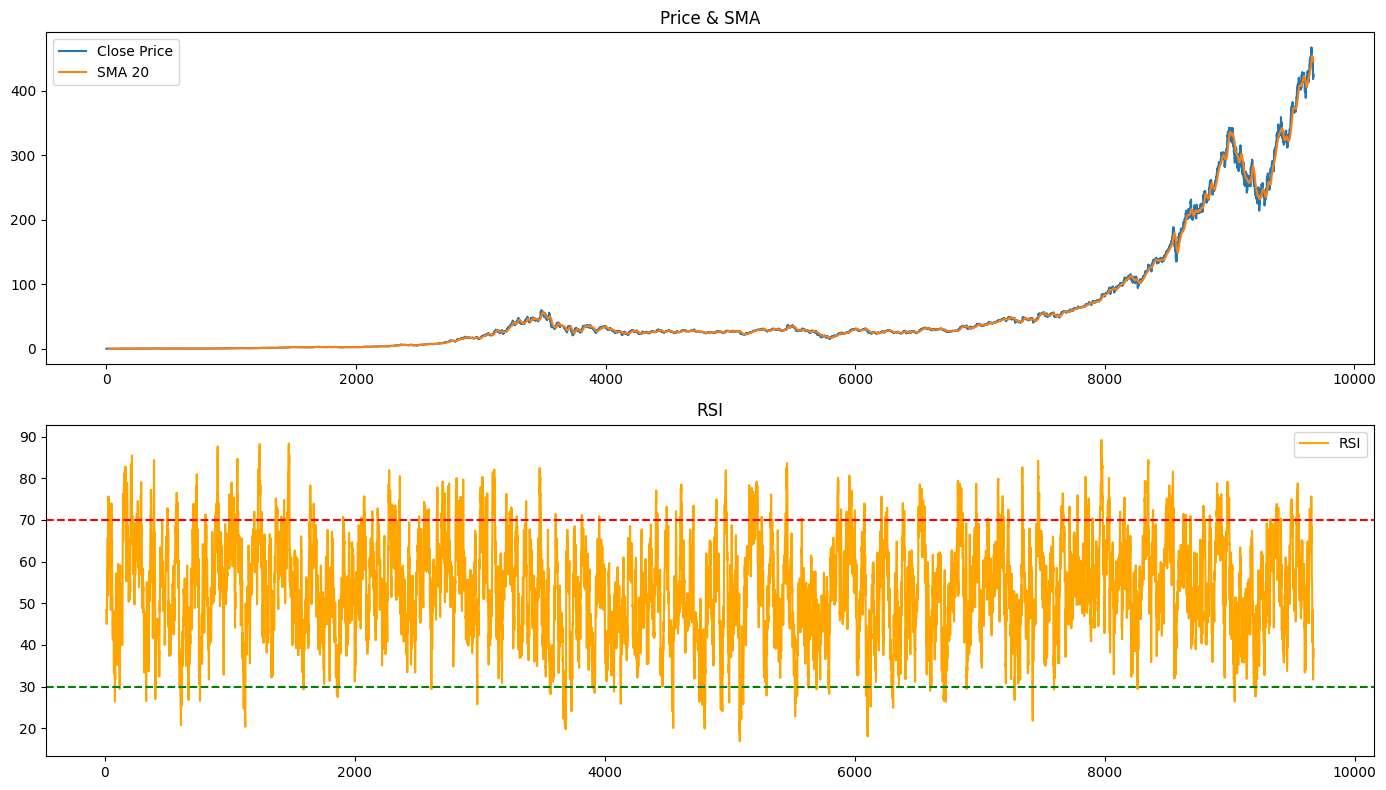

In [12]:
import matplotlib.pyplot as plt

# Visualize the indicators for MSFT
plt.figure(figsize=(14, 8))

# Price + SMA
plt.subplot(2, 1, 1)
plt.plot(data_msft['Close'], label='Close Price')
plt.plot(data_msft['SMA_20'], label='SMA 20')
plt.title("Price & SMA")
plt.legend()

# RSI + MACD
plt.subplot(2, 1, 2)
plt.plot(data_msft['RSI'], label='RSI', color='orange')
plt.title("RSI")
plt.axhline(70, linestyle='--', color='red')
plt.axhline(30, linestyle='--', color='green')
plt.legend()

plt.tight_layout()
plt.show()

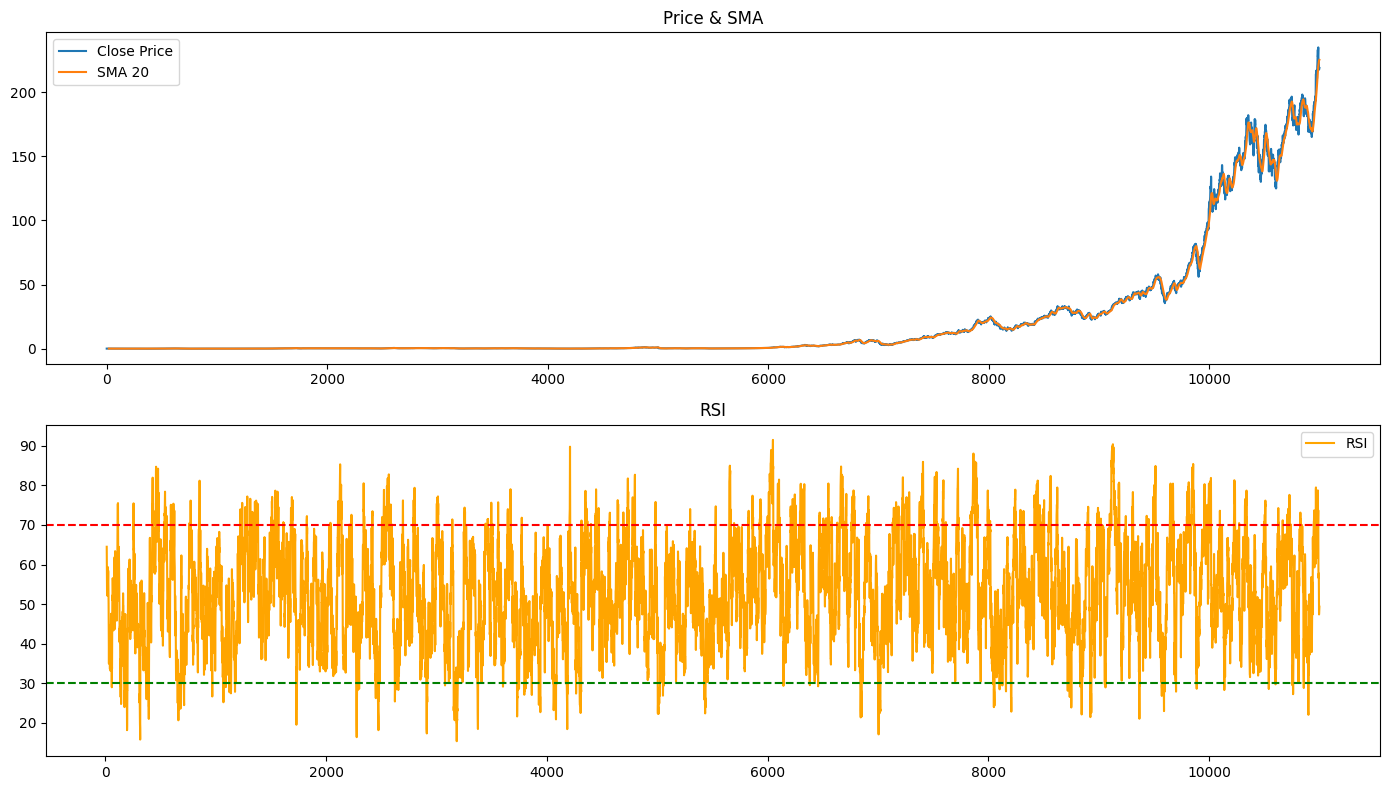

In [13]:
# visualize the indicators for AAPL
plt.figure(figsize=(14, 8))

# Price + SMA
plt.subplot(2, 1, 1)
plt.plot(data_AAPL['Close'], label='Close Price')
plt.plot(data_AAPL['SMA_20'], label='SMA 20')
plt.title("Price & SMA")
plt.legend()

# RSI + MACD
plt.subplot(2, 1, 2)
plt.plot(data_AAPL['RSI'], label='RSI', color='orange')
plt.title("RSI")
plt.axhline(70, linestyle='--', color='red')
plt.axhline(30, linestyle='--', color='green')
plt.legend()

plt.tight_layout()
plt.show()

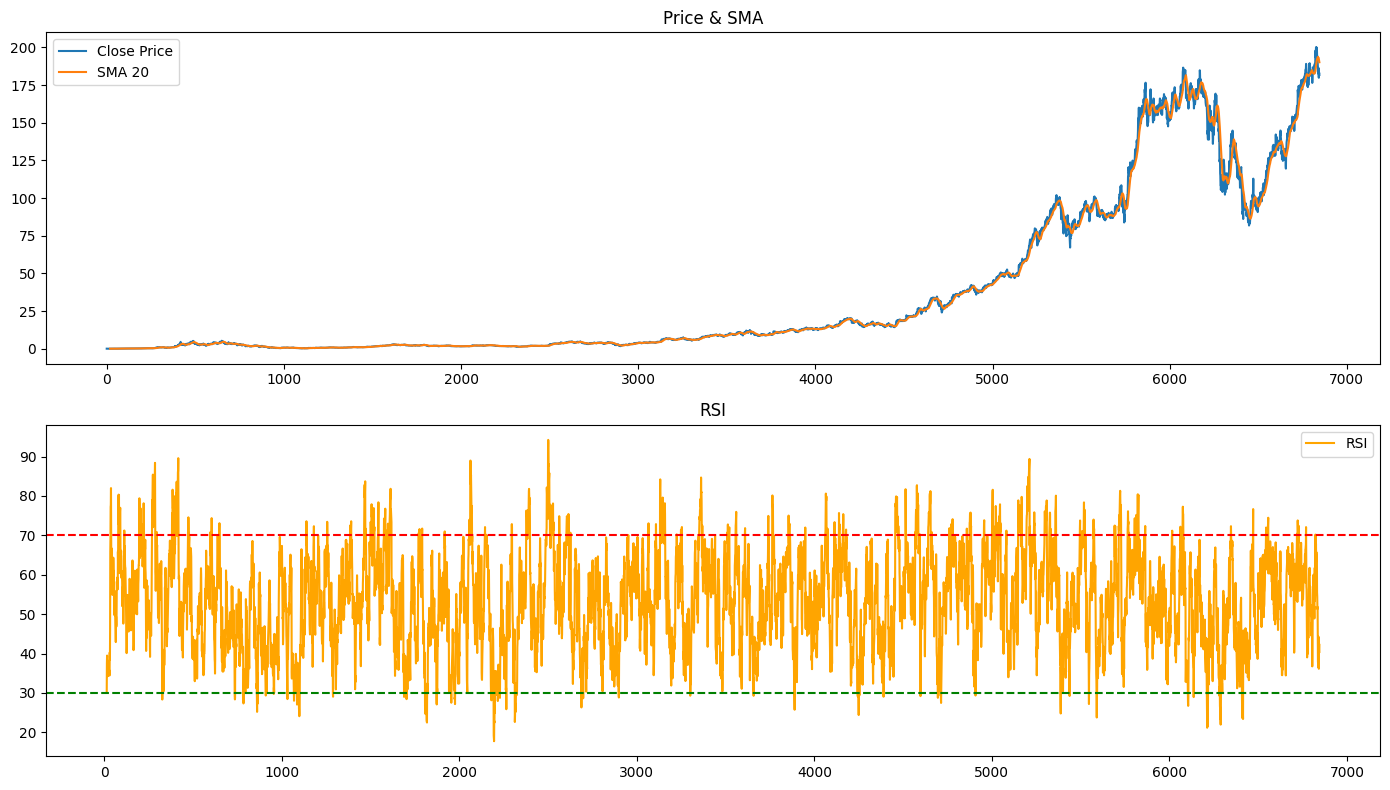

In [14]:
# VISUALIZE THE INDICATORS FOR AMZN
plt.figure(figsize=(14, 8))

# Price + SMA
plt.subplot(2, 1, 1)
plt.plot(data_AMZN['Close'], label='Close Price')
plt.plot(data_AMZN['SMA_20'], label='SMA 20')
plt.title("Price & SMA")
plt.legend()

# RSI + MACD
plt.subplot(2, 1, 2)
plt.plot(data_AMZN['RSI'], label='RSI', color='orange')
plt.title("RSI")
plt.axhline(70, linestyle='--', color='red')
plt.axhline(30, linestyle='--', color='green')
plt.legend()

plt.tight_layout()
plt.show()

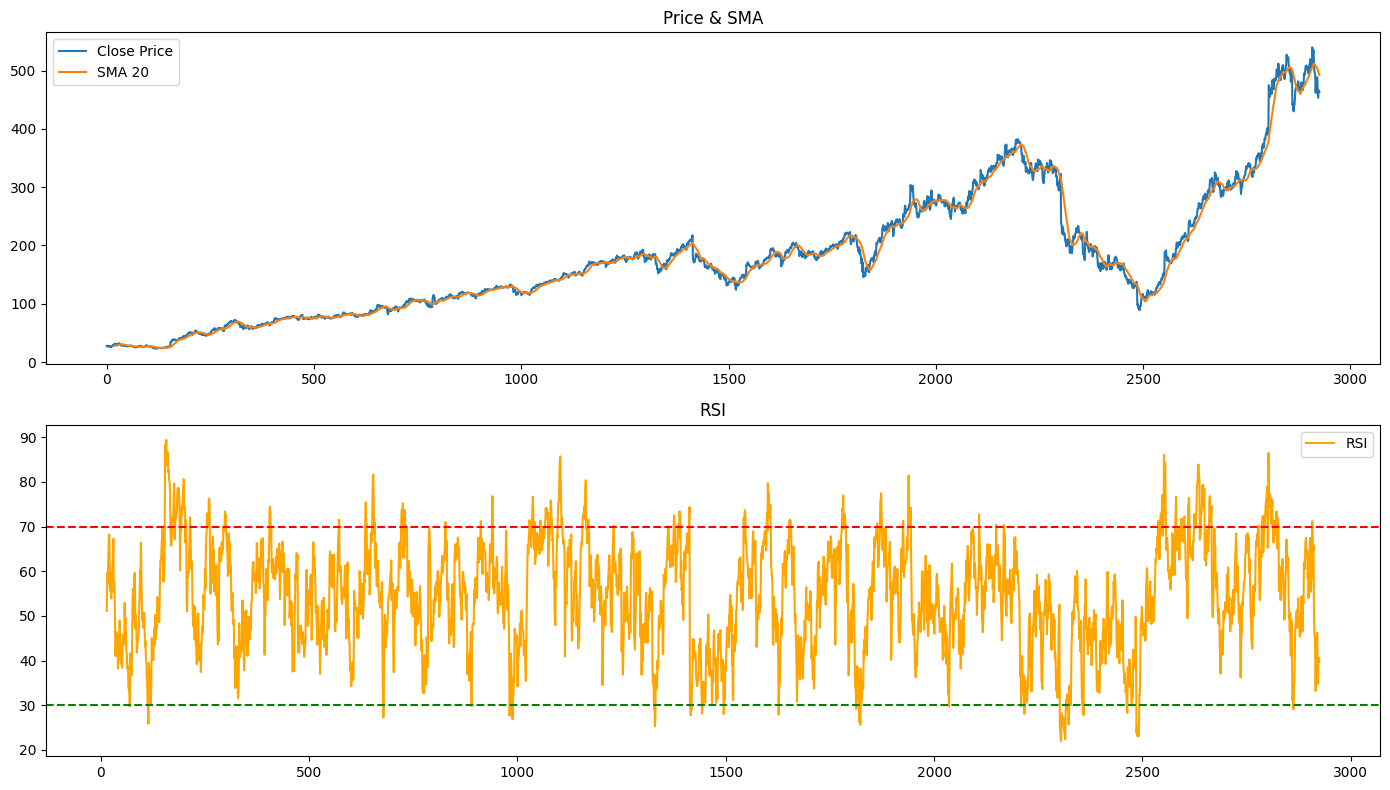

In [15]:
# visualize the indicators for meta
plt.figure(figsize=(14, 8))

# Price + SMA
plt.subplot(2, 1, 1)
plt.plot(data_META['Close'], label='Close Price')
plt.plot(data_META['SMA_20'], label='SMA 20')
plt.title("Price & SMA")
plt.legend()

# RSI + MACD
plt.subplot(2, 1, 2)
plt.plot(data_META['RSI'], label='RSI', color='orange')
plt.title("RSI")
plt.axhline(70, linestyle='--', color='red')
plt.axhline(30, linestyle='--', color='green')
plt.legend()

plt.tight_layout()
plt.show()

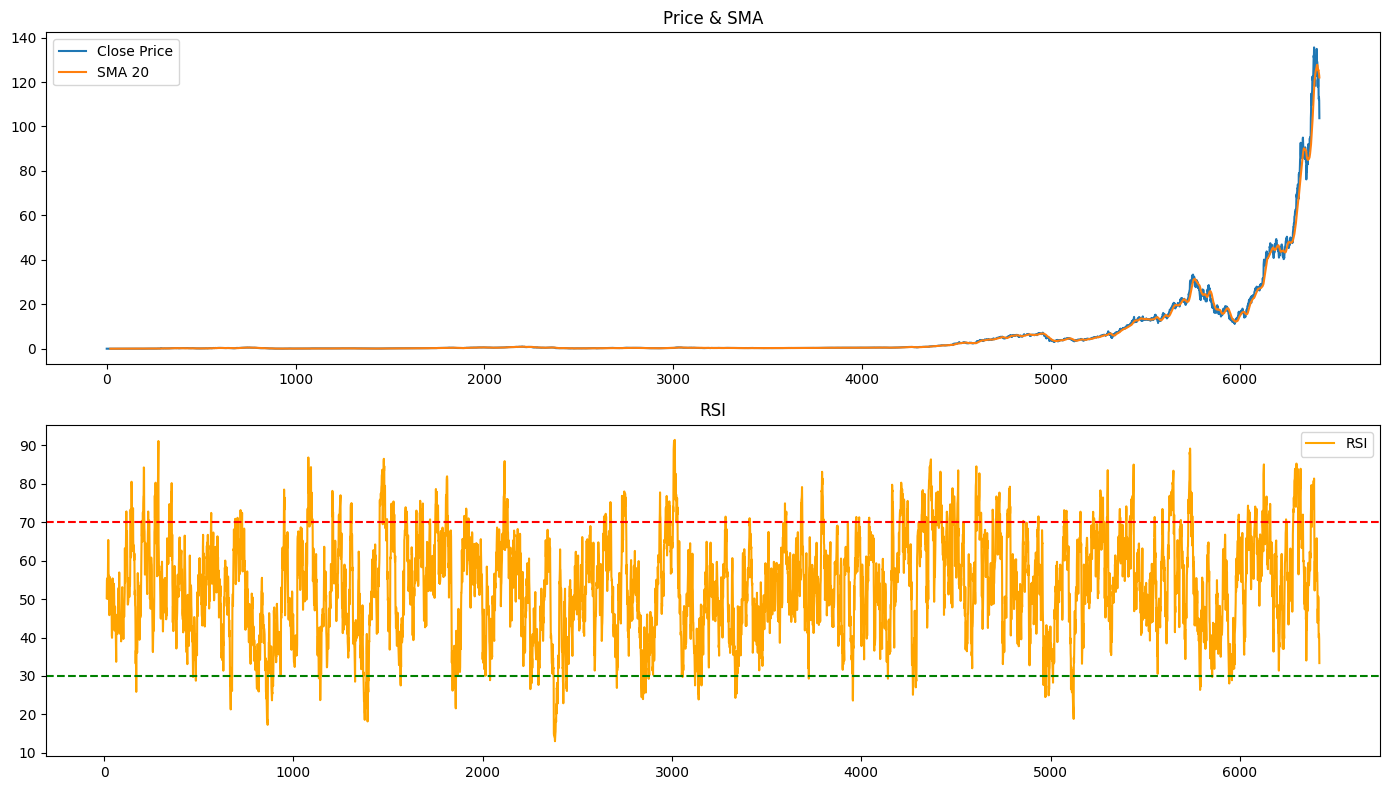

In [16]:
# visualize the indicators for nvda
plt.figure(figsize=(14, 8))

# Price + SMA
plt.subplot(2, 1, 1)
plt.plot(data_NVDA['Close'], label='Close Price')
plt.plot(data_NVDA['SMA_20'], label='SMA 20')
plt.title("Price & SMA")
plt.legend()

# RSI + MACD
plt.subplot(2, 1, 2)
plt.plot(data_NVDA['RSI'], label='RSI', color='orange')
plt.title("RSI")
plt.axhline(70, linestyle='--', color='red')
plt.axhline(30, linestyle='--', color='green')
plt.legend()

plt.tight_layout()
plt.show()

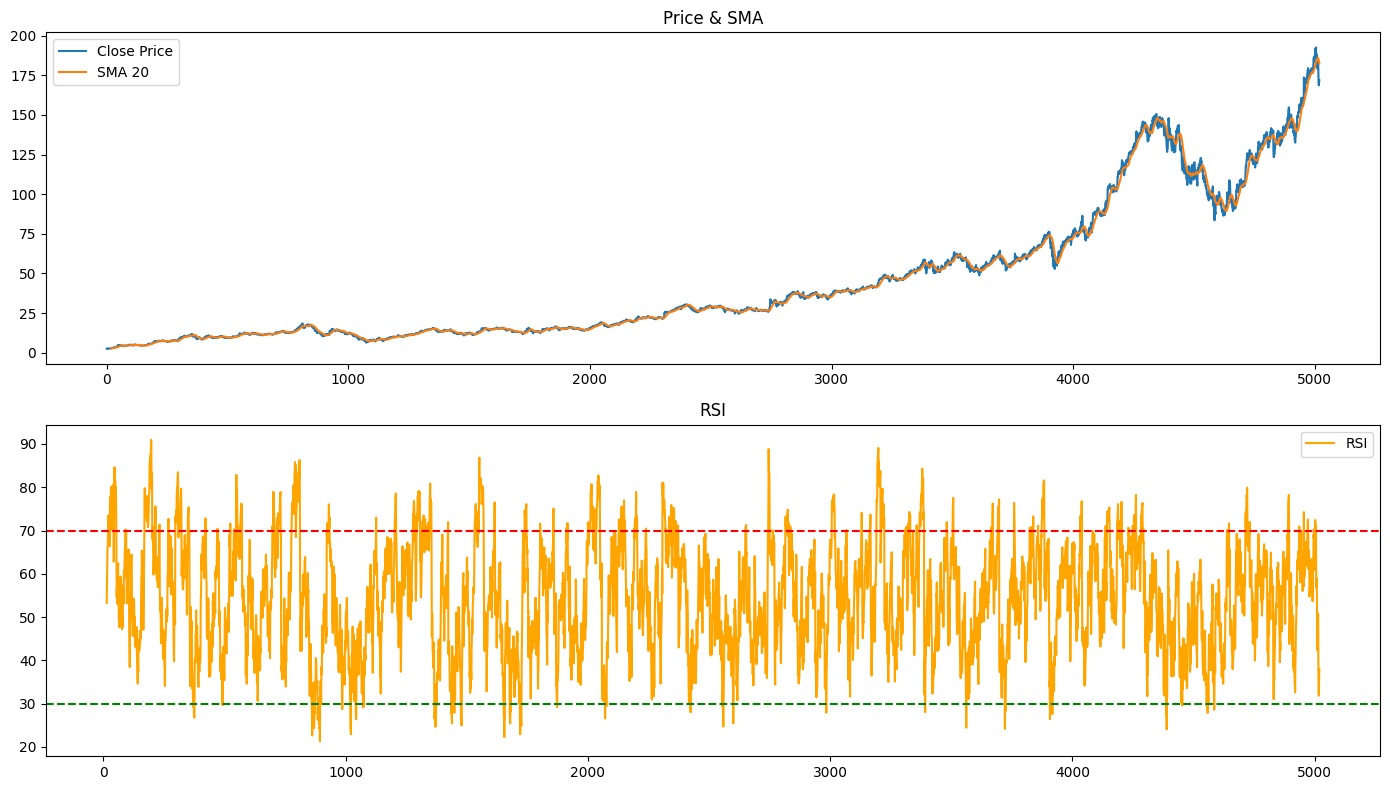

In [17]:
# visualize the indicators for goog
plt.figure(figsize=(14, 8))

# Price + SMA
plt.subplot(2, 1, 1)
plt.plot(data_GOOG['Close'], label='Close Price')
plt.plot(data_GOOG['SMA_20'], label='SMA 20')
plt.title("Price & SMA")
plt.legend()

# RSI + MACD
plt.subplot(2, 1, 2)
plt.plot(data_GOOG['RSI'], label='RSI', color='orange')
plt.title("RSI")
plt.axhline(70, linestyle='--', color='red')
plt.axhline(30, linestyle='--', color='green')
plt.legend()

plt.tight_layout()
plt.show()

### Use PyNance for Financial Metrics